In [3]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [4]:
train = pd.DataFrame(columns = ['label','path'])
test = pd.DataFrame(columns = ['label', 'path'])

In [5]:
import os

for dirname, _, filenames in os.walk('D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin v chihuaha'):
    for filename in filenames:
        #print(filename)
        paths = dirname.split(os.path.sep)
        batch = paths[-2]
        label = paths[-1]
        file_path = os.path.join(dirname,filename)
        
        dic = {'label': label, 'path': file_path}
        if batch == 'test':
            test.loc[len(test)] = dic
            
        elif batch == 'train':
            train.loc[len(train)] = dic

In [6]:
test.sample(5)

,label,path
791,muffin,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
1166,muffin,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
636,chihuahua,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
594,chihuahua,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
568,chihuahua,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...


In [7]:
train.sample(5)

,label,path
3862,muffin,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
2754,muffin,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
2291,chihuahua,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
3859,muffin,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...
909,chihuahua,D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin...


Text(0.5, 1.0, 'Muffin/Chihuahua in train set')

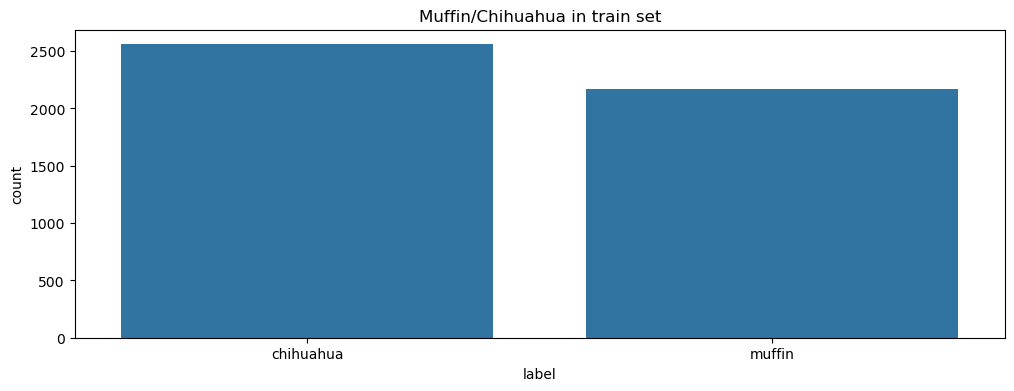

In [8]:
plt.figure(figsize = (12,4))
sns.countplot(data = train, x = 'label')
plt.title("Muffin/Chihuahua in train set")

Text(0.5, 1.0, 'Muffin/Chihuahua in test set')

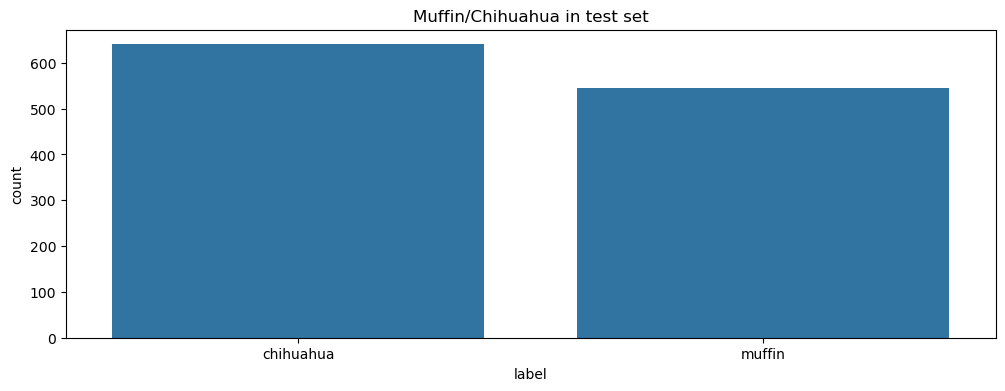

In [9]:
plt.figure(figsize = (12,4))
sns.countplot(data = test, x = 'label')
plt.title("Muffin/Chihuahua in test set")

In [10]:
datapath = "D:\\VS Code\\COURSE CODES\\CLASS 18 (CNNs)\\muffin v chihuaha\\"
CATEGORIES = ["chihuahua", "muffin"]

In [11]:
training = []
dataset = "train\\"
def createTrainingData():
    for category in CATEGORIES:
        path = datapath+dataset+category
        print(path)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(200,200))
            training.append([new_array, class_num])

In [13]:
testing = []
dataset = "test\\"
def createTestingData():
    for category in CATEGORIES:
        path = datapath+dataset+category
        print(path)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(200,200))
            testing.append([new_array, class_num])

In [14]:
createTrainingData()

D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin v chihuaha\test\chihuahua
D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin v chihuaha\test\muffin


In [15]:
createTestingData()

D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin v chihuaha\test\chihuahua
D:\VS Code\COURSE CODES\CLASS 18 (CNNs)\muffin v chihuaha\test\muffin


In [16]:
len(training)

1184

In [17]:
len(testing)

1184

In [18]:
import random
random.shuffle(training)
random.shuffle(testing)

In [19]:
x = []
y = []
for features, label in training:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,200,200,3)

In [20]:
x_test = []
y_test = []
for features, label in training:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1,200,200,3)

In [21]:
max(y)

1

In [22]:
max(y_test)

1

In [23]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import keras.utils
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [24]:
x = x.astype('float32')
x /= 255
y = keras.utils.to_categorical(y,2)
print(y[100])
print(np.shape(y))

[0. 1.]
(1184, 2)


In [25]:
x_test = x_test.astype('float32')
x_test /= 255
y_test = keras.utils.to_categorical(y_test,2)
print(y_test[100])
print(np.shape(y_test))

[0. 1.]
(1184, 2)


In [23]:
x

array([[[[0.9764706 , 0.9843137 , 0.9882353 ],
         [0.9764706 , 0.9843137 , 0.9882353 ],
         [0.98039216, 0.9882353 , 0.99215686],
         ...,
         [0.8509804 , 0.88235295, 0.93333334],
         [0.83137256, 0.85882354, 0.91764706],
         [0.8156863 , 0.84313726, 0.9098039 ]],

        [[0.9843137 , 0.99215686, 0.99215686],
         [0.98039216, 0.9882353 , 0.99215686],
         [0.98039216, 0.9882353 , 0.99215686],
         ...,
         [0.84313726, 0.8745098 , 0.9254902 ],
         [0.81960785, 0.84705883, 0.90588236],
         [0.8039216 , 0.83137256, 0.8980392 ]],

        [[0.98039216, 0.9882353 , 0.99215686],
         [0.98039216, 0.9882353 , 0.99215686],
         [0.98039216, 0.9882353 , 0.99215686],
         ...,
         [0.8509804 , 0.88235295, 0.93333334],
         [0.8235294 , 0.8509804 , 0.9098039 ],
         [0.8117647 , 0.8392157 , 0.90588236]],

        ...,

        [[0.4862745 , 0.40784314, 0.45882353],
         [0.5058824 , 0.43137255, 0.49411765]

In [24]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [42]:
x.shape

(1184, 200, 200, 3)

In [43]:
y.shape

(1184, 2)

In [54]:
batch_size = 256
nb_classes = 2
nb_epochs = 15
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [36]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(2,  activation=tf.nn.softmax)
    ])
model.summary()   

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 100, 100, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 50, 50, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 25, 25, 16)       

In [37]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3),
]

In [56]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

In [57]:
model.fit(x, y, 
          batch_size = batch_size, 
          epochs = nb_epochs, 
          callbacks=my_callbacks,
          verbose = 1, 
          validation_data = (x_test, y_test))

Epoch 1/15
5/5 [==============================] - 358s 75s/step - loss: 0.8038 - accuracy: 0.5236 - val_loss: 0.6882 - val_accuracy: 0.4595
Epoch 2/15
5/5 [==============================] - 106s 22s/step - loss: 0.6805 - accuracy: 0.4595 - val_loss: 0.6619 - val_accuracy: 0.4611
Epoch 3/15
5/5 [==============================] - 70s 14s/step - loss: 0.6434 - accuracy: 0.5465 - val_loss: 0.6161 - val_accuracy: 0.7500
Epoch 4/15
5/5 [==============================] - 462s 101s/step - loss: 0.6036 - accuracy: 0.7264 - val_loss: 0.5582 - val_accuracy: 0.7922
Epoch 5/15
5/5 [==============================] - 466s 101s/step - loss: 0.5344 - accuracy: 0.7720 - val_loss: 0.4627 - val_accuracy: 0.8100
Epoch 6/15
5/5 [==============================] - 484s 103s/step - loss: 0.4805 - accuracy: 0.7770 - val_loss: 0.5638 - val_accuracy: 0.7568
Epoch 7/15
5/5 [==============================] - 582s 123s/step - loss: 0.4858 - accuracy: 0.7889 - val_loss: 0.4036 - val_accuracy: 0.8395
Epoch 8/15
5/5 [=

In [59]:
from tensorflow.keras.models import load_model

model.save('trained_model.h5')

c:\Users\Vatsu.Daita\.conda\envs\py3115\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
def predict(path):
    
    test_img = cv2.imread(path)
    test_image = cv2.resize(test_img, (200,200))
    test_image = np.array(test_image).reshape(-1,200,200,3)
    test_image = test_image.astype('float32')
    test_image /= 255
    predicted_label = model.predict(test_image)
    pred = list(predicted_label[0])
    max_conf = max(pred)
    pred_label = CATEGORIES[pred.index(max_conf)]
    plt.title(pred_label)
    plt.imshow(test_img)

1/1 [==============================] - 0s 443ms/step


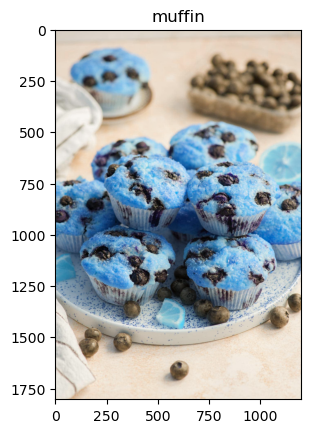

In [61]:
predict('D:\\VS Code\\COURSE CODES\\CLASS 18 (CNNs)\\muffin v chihuaha\\test\\muffin\\img_0_10.jpg')

# Load the saved weight file to infer

In [2]:
import keras
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

model_infer = load_model('trained_model.h5')
CATEGORIES = ["chihuahua", "muffin"]

def saved_model_predict(path):
    
    test_img = cv2.imread(path)
    test_image = cv2.resize(test_img, (200,200))
    test_image = np.array(test_image).reshape(-1,200,200,3)
    test_image = test_image.astype('float32')
    test_image /= 255
    predicted_label = model_infer.predict(test_image)
    pred = list(predicted_label[0])
    max_conf = max(pred)
    pred_label = CATEGORIES[pred.index(max_conf)]
    plt.title(pred_label)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    

1/1 [==============================] - 0s 44ms/step


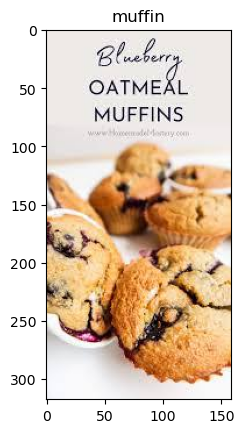

In [5]:
saved_model_predict('D:\\VS Code\\COURSE CODES\\CLASS 18 (CNNs)\\muffin v chihuaha\\train\\muffin\\img_4_1129.jpg')